In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Data reading
df_all = pd.read_excel("all_merged_data.xlsx")
df = df_all.drop(['Unnamed: 0', 'Gene', 'TF number', 'Assigned name', 'KO_inRedStar', 'KO_normalized_inRedStar'], axis=1)
print(df.head())

   scSoA  scYFP  inYFP  scTlG  scYFP_HAC1  OE_rProt_total  OE_rProt_normalized
0  -4.20  -0.67    0.0   0.00        0.00        1.762627             1.772074
1  -1.22  -0.70    0.0   0.22        0.00        1.000000             1.000000
2   1.48   1.08    0.0   0.72        1.02        0.960393             0.955512
3   0.84   0.00    0.0  -0.28        0.00        1.564276             1.467663
4   0.57   0.36    0.0   0.00        0.00        0.757495             0.833487


In [37]:
# K-means clustering

# Data standardisation
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Grouping by k-means
kmeans = KMeans(n_clusters=10, random_state=42)
df['Clusters'] = kmeans.fit_predict(df_scaled)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [38]:
pd.options.display.max_rows = 200

df_all['Clusters'] = df['Clusters']
df_sorted = df_all.sort_values('Clusters').drop(['Unnamed: 0', 'KO_inRedStar', 'KO_normalized_inRedStar'], axis=1)

print(df_sorted)

df_sorted.to_excel('clusters_wo_KO.xlsx')



        Gene TF number       Assigned name  scSoA  scYFP  inYFP  scTlG  \
7     D14872     TF034                   -  -2.15  -0.64   1.30   1.40   
69    B20944     TF011                   -   0.22   0.00   0.00   0.00   
100   E17721     TF046                   -   0.00   0.00   0.00   0.00   
99    E17215     TF045                   -   0.00   0.00   0.00   0.00   
98    E03410     TF040              ERT1-2   0.00   0.00   0.00   0.00   
97    D23045     TF038                AHR1   0.00   0.00   0.00   0.00   
96    D20460     TF036                LAC9   0.00   0.00   0.00   0.00   
95    D14520     TF033                SKN7   0.00   0.00   0.00   0.00   
94    D06193     TF027                   -   0.00   0.00   0.00   0.00   
93    C16390     TF021                   -   0.00   0.00   0.00   0.00   
92    C15202     TF020                   -   0.00   0.00   0.00   0.00   
90    B14443     TF009                JMC2   0.00   0.00   0.00   0.00   
89    B09713     TF005                

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

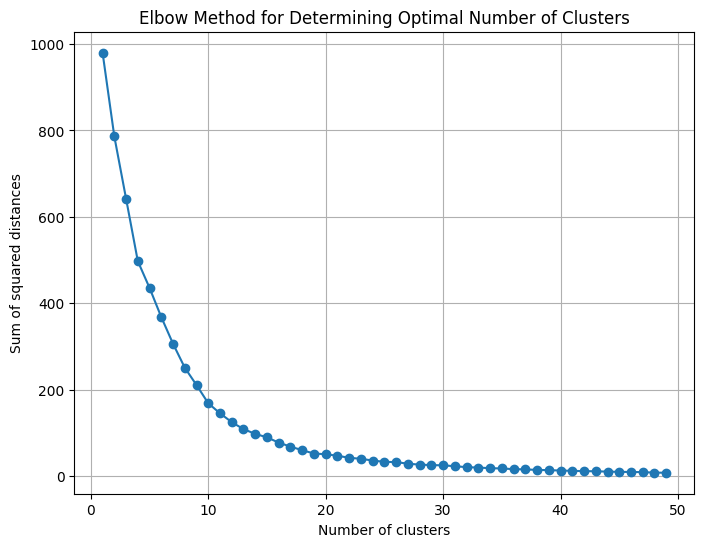

In [39]:
# Wykorzystanie metody łokcia do określenia liczby klastrów

import numpy as np


# Creating an elbow method chart
inertias = []

for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
    

plt.figure(figsize=(8, 6))
plt.plot(range(1, 50), inertias, '-o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.grid(True)
plt.savefig('Figure_S1.png')


In [40]:
import pandas as pd

merged_results = pd.read_excel('clusters_wo_KO.xlsx')

In [45]:
merged_results["order"] = merged_results.iloc[:, 4:11].mean(axis=1)

sorted_df = merged_results.groupby('Clusters', group_keys=False).apply(lambda x: x.sort_values(by='order'))

# Drop the 'Unnamed: 0' column if it exists
sorted_df = sorted_df.drop(columns=['Unnamed: 0'])

#sorted_df.to_excel('clusters_wo_KO_sorted.xlsx')
print(sorted_df)

        Gene TF number       Assigned name  scSoA  scYFP  inYFP  scTlG  \
0     D14872     TF034                   -  -2.15  -0.64   1.30   1.40   
38    C19151     TF122                CAT8   0.00   0.00   0.00   0.00   
8     D06193     TF027                   -   0.00   0.00   0.00   0.00   
32    F09361     TF060  U4/U6.U5 component   0.00   0.00   0.00   0.00   
94    F03135     TF097                   -  -0.34   0.00   0.00   0.00   
68    C13178     TF019                   -  -0.43   0.00   0.00   0.37   
59    F16599     TF064                   -   0.00   0.00   0.00   0.00   
7     D14520     TF033                SKN7   0.00   0.00   0.00   0.00   
42    C19063     TF112                   -   0.00   0.00   0.00   0.00   
33    E05577     TF139                   -   0.00   0.00   0.00   0.00   
51    D02475     TF076                   -   0.00   0.00   0.00   0.00   
52    F05346     TF075                   -   0.00   0.00   0.00   0.00   
4     E03410     TF040              ER

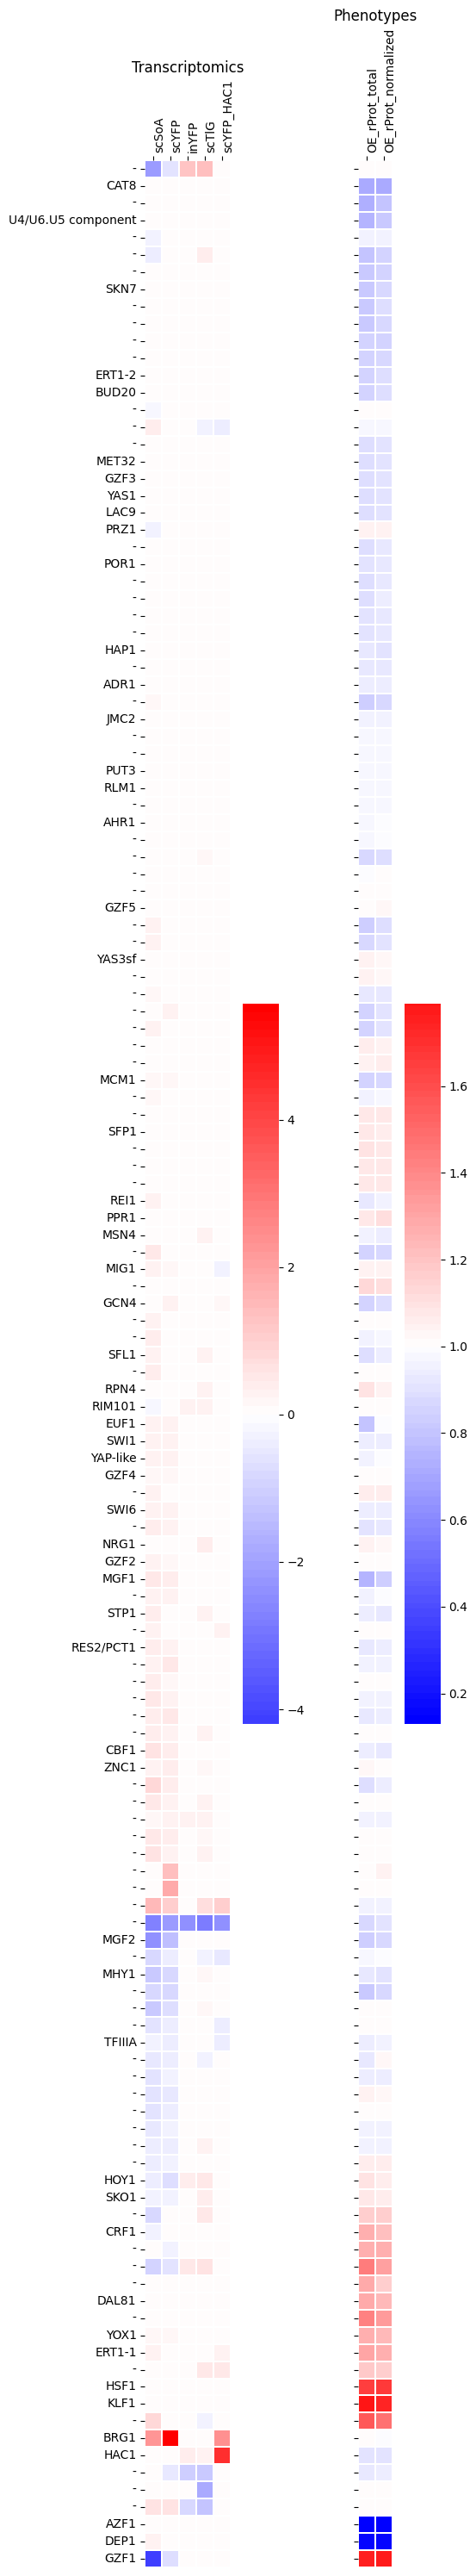

In [42]:
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import seaborn as sns


# Define the numeric data and row labels
numeric_data1 = sorted_df.iloc[:, 3:8]
numeric_data2 = sorted_df.iloc[:, 8:10]
row_labels = sorted_df['Assigned name']

# Create a custom colormap
colors = ['blue', 'white', 'red']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 30), sharey=True)

# Plot the first heatmap
sns.heatmap(numeric_data1, ax=ax1, yticklabels=row_labels, cmap=cmap, center=0, cbar=True, linewidths=0.05, square=True)
ax1.xaxis.tick_top()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='left')
ax1.set_title('Transcriptomics')

# Plot the second heatmap
sns.heatmap(numeric_data2, ax=ax2, yticklabels=row_labels, cmap=cmap, center=1, cbar=True, linewidths=0.05, square=True)
ax2.xaxis.tick_top()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='left')
ax2.set_title('Phenotypes')

# Adjust the layout
plt.tight_layout()
plt.show()

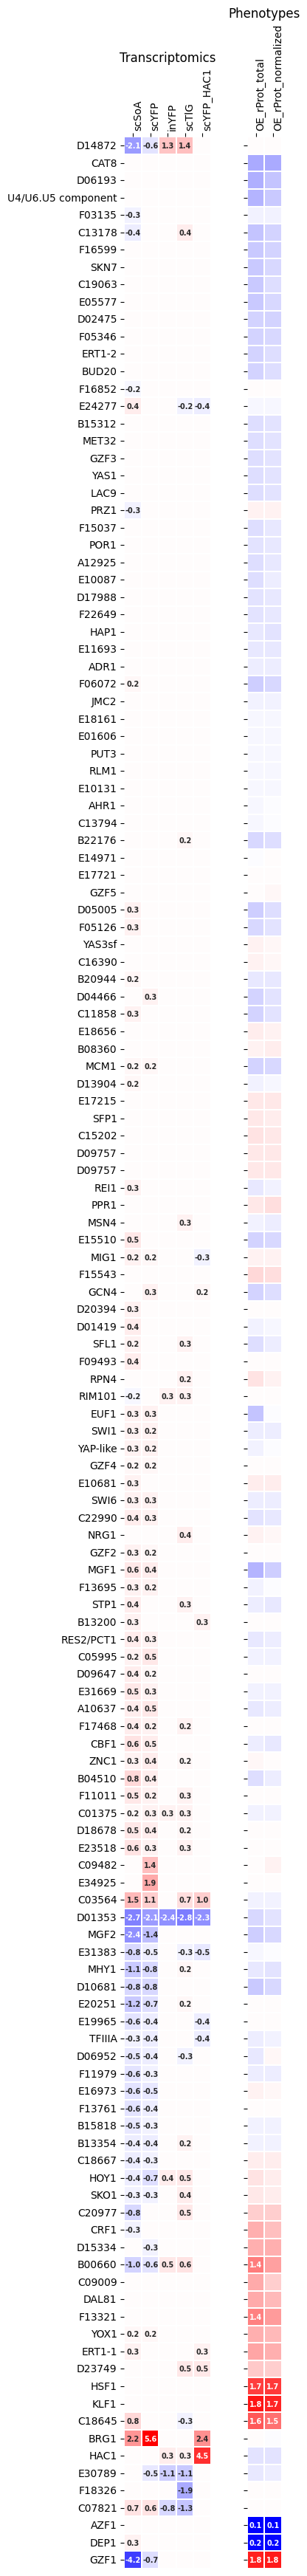

In [43]:
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Define the numeric data and row labels
numeric_data1 = sorted_df.iloc[:, 3:8]
numeric_data2 = sorted_df.iloc[:, 8:10]

row_labels = [gene if assigned_name == '-' else assigned_name 
              for assigned_name, gene in zip(sorted_df['Assigned name'], sorted_df['Gene'])]

# Create a custom colormap
colors = ['blue', 'white', 'red']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)

annot_kws = {"size": 7, "weight": "bold"}


# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5, 35), sharey=True)

# Plot the first heatmap
annot_data1 = numeric_data1.map(lambda x: f'{x:.1f}' if x != 0 else '')

# Create a blank annotation matrix for numeric_data2
annot_data2 = pd.DataFrame('', index=numeric_data2.index, columns=numeric_data2.columns)

# Specify annotations for chosen variants
annotations2 = {
    'OE_rProt_total': ['TF003', 'TF037', 'TF068', 'TF119', 'TF121', 'TF124', 'TF126', 'TF128'],
    'OE_rProt_normalized': ['TF037', 'TF068', 'TF121', 'TF124', 'TF126', 'TF128'],
}

# Add annotations based on specified genes
for column, genes in annotations2.items():
    for gene in genes:
        if gene in sorted_df['TF number'].values:
            annot_data2.loc[sorted_df['TF number'] == gene, column] = numeric_data2.loc[sorted_df['TF number'] == gene, column].apply(lambda x: f'{x:.1f}')


sns.heatmap(numeric_data1, ax=ax1, yticklabels=row_labels, cmap=cmap, center=0, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data1, fmt='', annot_kws=annot_kws)
ax1.xaxis.tick_top()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='left')
ax1.set_title('Transcriptomics')

# Plot the second heatmap
sns.heatmap(numeric_data2, ax=ax2, yticklabels=row_labels, cmap=cmap, center=1, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data2, fmt='', annot_kws=annot_kws)
ax2.xaxis.tick_top()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='left')
ax2.set_title('Phenotypes')

# Adjust the layout
plt.tight_layout()
plt.show()


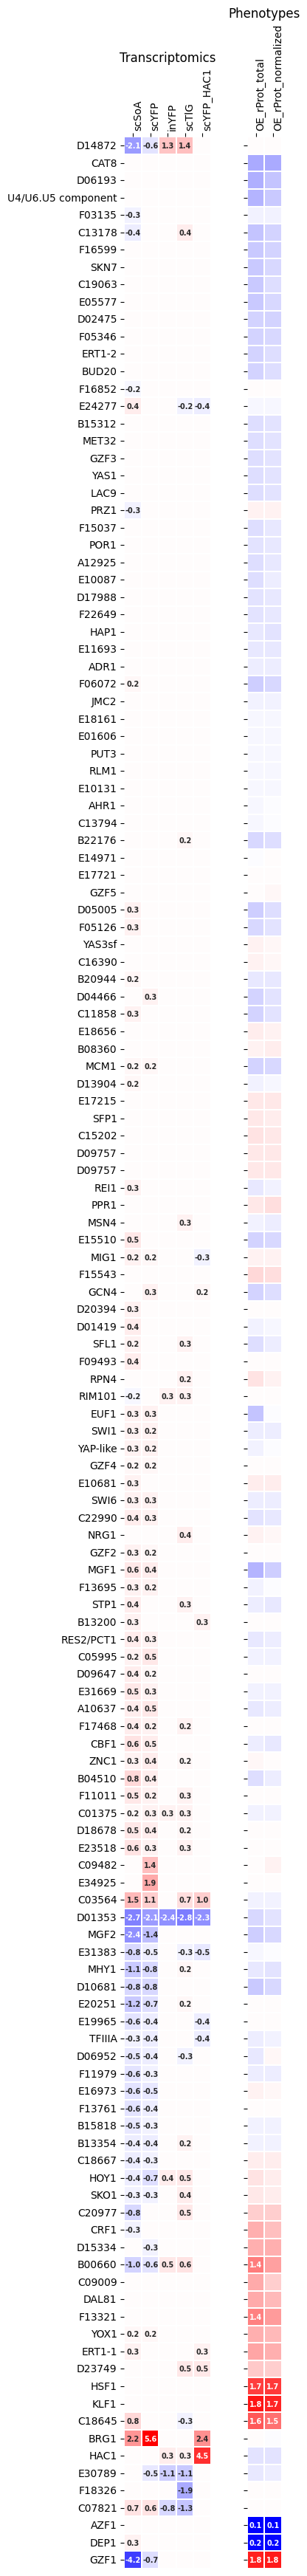

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Define the numeric data and row labels
numeric_data1 = sorted_df.iloc[:, 3:8]
numeric_data2 = sorted_df.iloc[:, 8:10]

row_labels = [gene if assigned_name == '-' else assigned_name 
              for assigned_name, gene in zip(sorted_df['Assigned name'], sorted_df['Gene'])]

# Create a custom colormap
colors = ['blue', 'white', 'red']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)

annot_kws = {"size": 7, "weight": "bold"}


# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5, 35), sharey=True)

# Plot the first heatmap
annot_data1 = numeric_data1.map(lambda x: f'{x:.1f}' if x != 0 else '')

# Create a blank annotation matrix for numeric_data2
annot_data2 = pd.DataFrame('', index=numeric_data2.index, columns=numeric_data2.columns)

# Specify annotations for chosen variants
annotations2 = {
    'OE_rProt_total': ['TF003', 'TF037', 'TF068', 'TF119', 'TF121', 'TF124', 'TF126', 'TF128'],
    'OE_rProt_normalized': ['TF037', 'TF068', 'TF121', 'TF124', 'TF126', 'TF128'],
}

# Add annotations based on specified genes
for column, genes in annotations2.items():
    for gene in genes:
        if gene in sorted_df['TF number'].values:
            annot_data2.loc[sorted_df['TF number'] == gene, column] = numeric_data2.loc[sorted_df['TF number'] == gene, column].apply(lambda x: f'{x:.1f}')


sns.heatmap(numeric_data1, ax=ax1, yticklabels=row_labels, cmap=cmap, center=0, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data1, fmt='', annot_kws=annot_kws)
ax1.xaxis.tick_top()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='left')
ax1.set_title('Transcriptomics')

# Plot the second heatmap
sns.heatmap(numeric_data2, ax=ax2, yticklabels=row_labels, cmap=cmap, center=1, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data2, fmt='', annot_kws=annot_kws)
ax2.xaxis.tick_top()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='left')
ax2.set_title('Phenotypes')

# Adjust the layout
plt.tight_layout()
plt.show()
